In [98]:
%matplotlib inline
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model 
import matplotlib.pylab as plt
import pandas as pd
import cv2
import os
import itertools
import shutil
import random
import glob
from matplotlib.font_manager import FontProperties
from celluloid import Camera # getting the camera
from IPython.display import HTML # to show the animation in Jupyter
import warnings
warnings.simplefilter(action='ignore')
fontP = FontProperties()
fontP.set_size('xx-small')

In [117]:
base = '/Users/yusuf/Downloads/train'
paths   = os.listdir(base)

In [119]:
# We are creating our test set
ls = {'path':[],'class':[]}
if os.path.isdir(base) is True:
    paths   = os.listdir(base)
    pr =  10.
    for k in range(len(paths)):
        if os.path.isdir(os.path.join(base,paths[k])):
          for f in os.listdir(os.path.join(base,paths[k])):
            file =  os.path.join(os.path.join(base,paths[k]),f)
            clas =  f.split('/')[-1].split('.')
            classes =  clas[0].split('-')[0]
            ls['path'].append(file)
            ls['class'].append(classes)

In [120]:
df  = pd.DataFrame(ls)
df.head()


path   class
0  /Users/yusuf/Downloads/train/Healthy/Normal-9.png  Normal
1  /Users/yusuf/Downloads/train/Healthy/Normal-12...  Normal
2  /Users/yusuf/Downloads/train/Healthy/Normal-13...  Normal
3  /Users/yusuf/Downloads/train/Healthy/Normal-8.png  Normal
4  /Users/yusuf/Downloads/train/Healthy/Normal-11...  Normal

In [131]:
def predict(model,df,size=(224,224)):
    for i in range(df.shape[0]):
        file = df.iloc[k,0]
        img =  image.load_img(file,target_size=size)
        x =  image.img_to_array(img)
        x  =  np.expand_dims(x,axis=0)
        x =  preprocess_input(x)
        feature_maps =  model.predict(x)
    return feature_maps


def visualize(feature_maps,square=8):
    ix = 1
    plt.figure(figsize=(8,6),dpi=300)
    # camera = Camera(fig)# the camera gets our figure
    for _ in range(square):
        for _ in range(square):
            ax  =  plt.subplot(square,square,ix)

            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0,:,:,ix-1],cmap=plt.cm.jet) #cmap=plt.cm.rainbow
            ix += 1
    plt.subplots_adjust(wspace=0, hspace=0)
#     plt.savefig(f'{figure}/vgg19_before_retrain_.pdf',bbox_inches='tight', dpi=300)
    plt.show()

In [122]:
mpath = '/Users/yusuf/Downloads/models/vgg19_.model.h5'

In [123]:
img_path  = '/Users/yusuf/Downloads/COVID-22.png'
ipath = '/Users/yusuf/Downloads/julius-maada-1.jpeg'
path = os.getcwd()
figure =  os.path.join(path,'src')

# We are visualizing the first convulution block in the pre-trained model

In [124]:

model =  VGG16(weights='imagenet',include_top=False)
model =  Model(inputs=model.input, outputs=model.layers[9].output)
img =  image.load_img(img_path,target_size=(224,224))
x =  image.img_to_array(img)
x  =  np.expand_dims(x,axis=0)
x =  preprocess_input(x)
feature_maps =  model.predict(x)

In [58]:
# for i in range(len(model.layers)):
#     layer =  model.layers[i]
#     if 'conv' not in layer.name:
#         continue
    
#     print(i,layer.name,layer.output.shape)

In [125]:
feature_maps = predict(model,df)

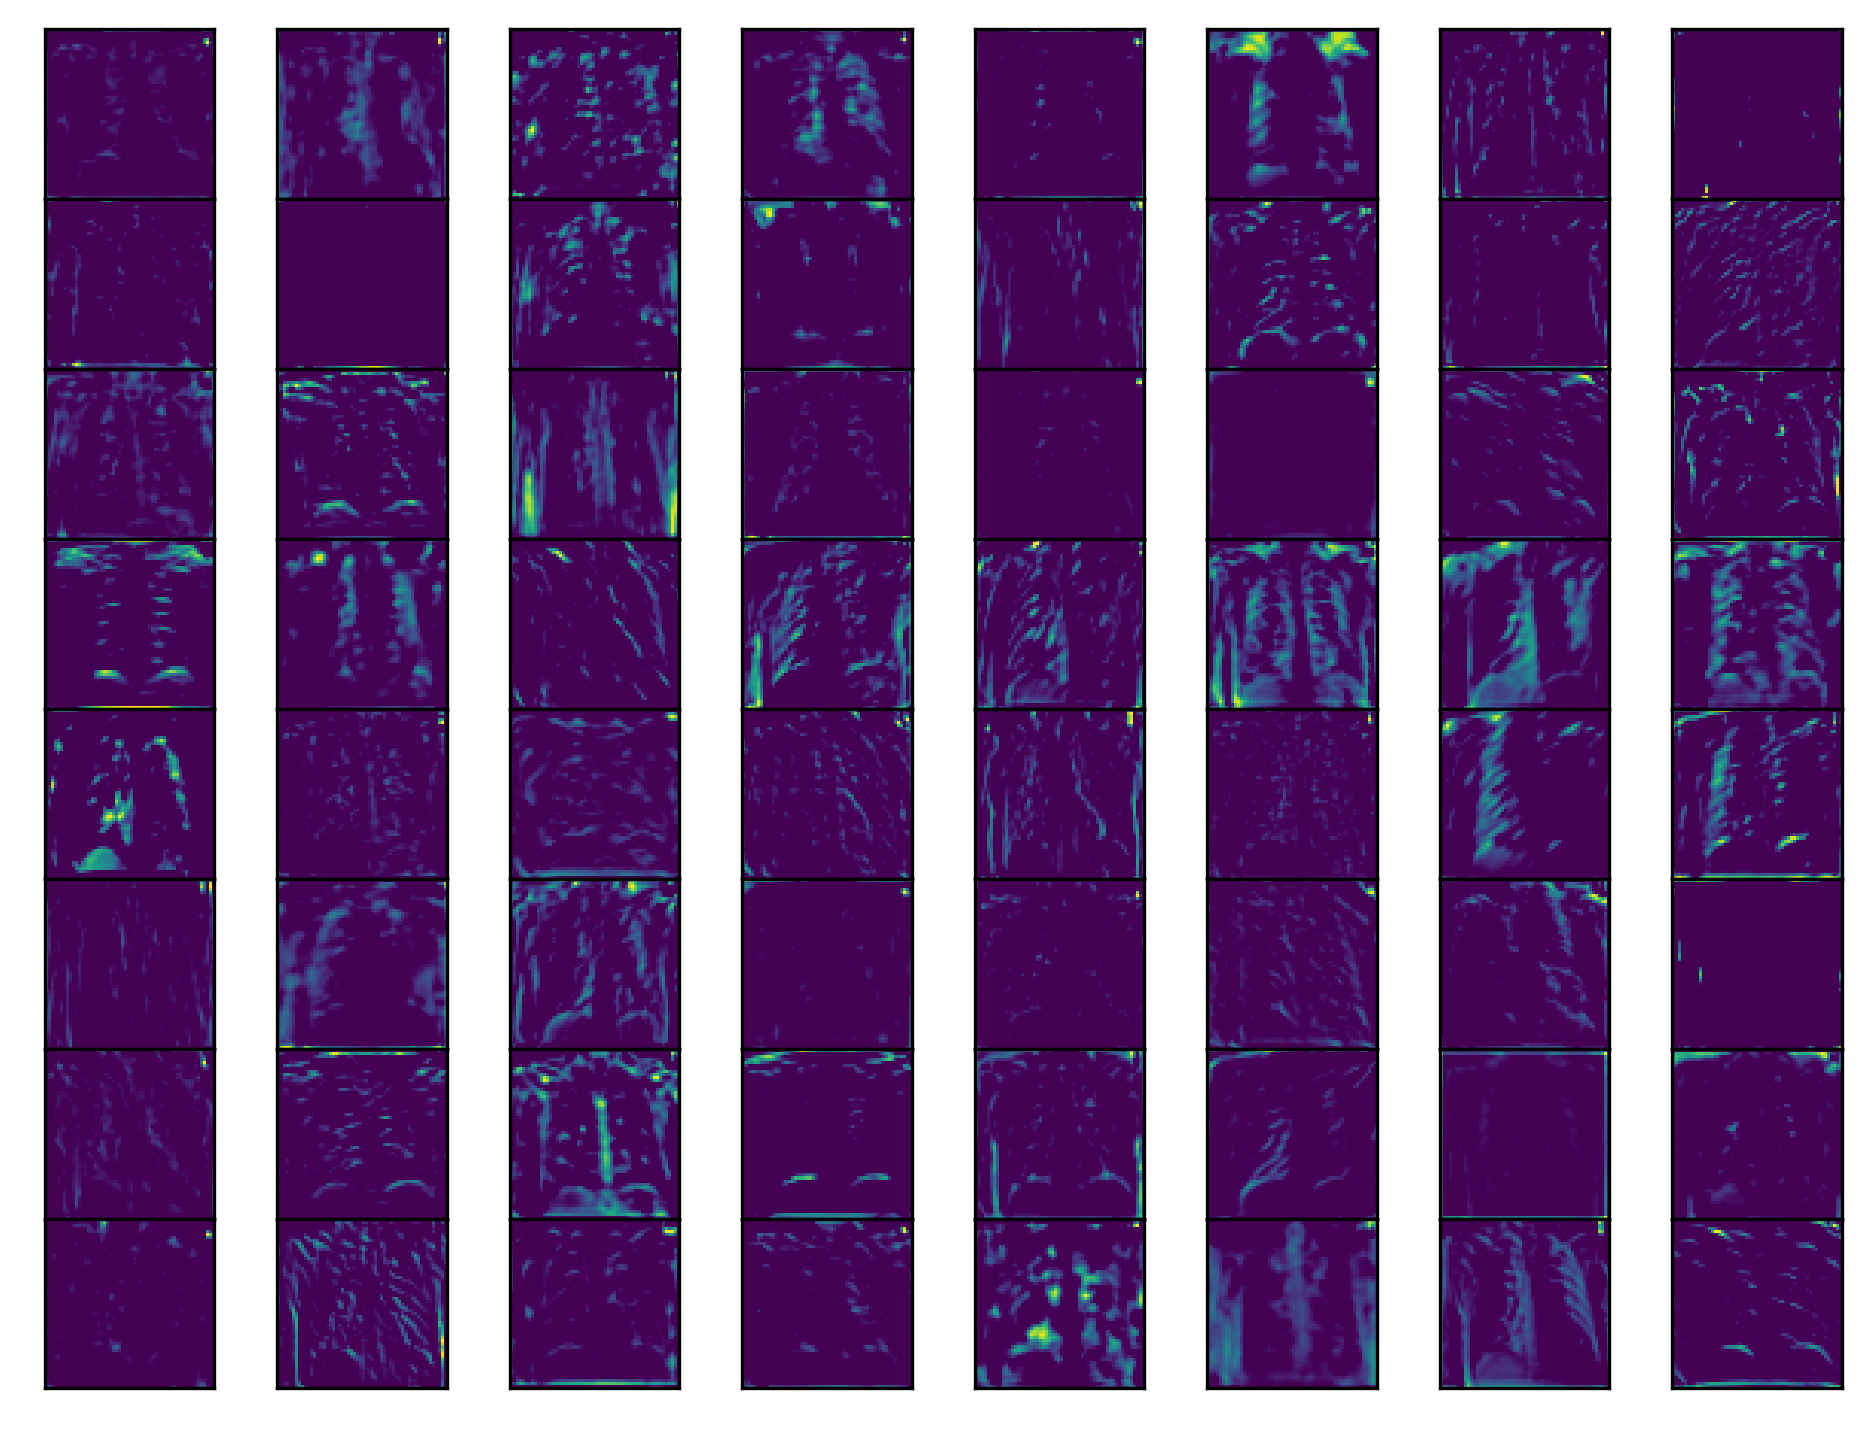

In [126]:
visualize(feature_maps,square=8)

# We are visualizing the first convulution block in the trained model

In [129]:
tmodel =  load_model(mpath)
model =  Model(inputs=tmodel.input, outputs=tmodel.layers[9].output)
# img =  image.load_img(img_path,target_size=(128,128))
# x =  image.img_to_array(img)
# x  =  np.expand_dims(x,axis=0)
# x =  preprocess_input(x)
# feature_maps =  model.predict(x)


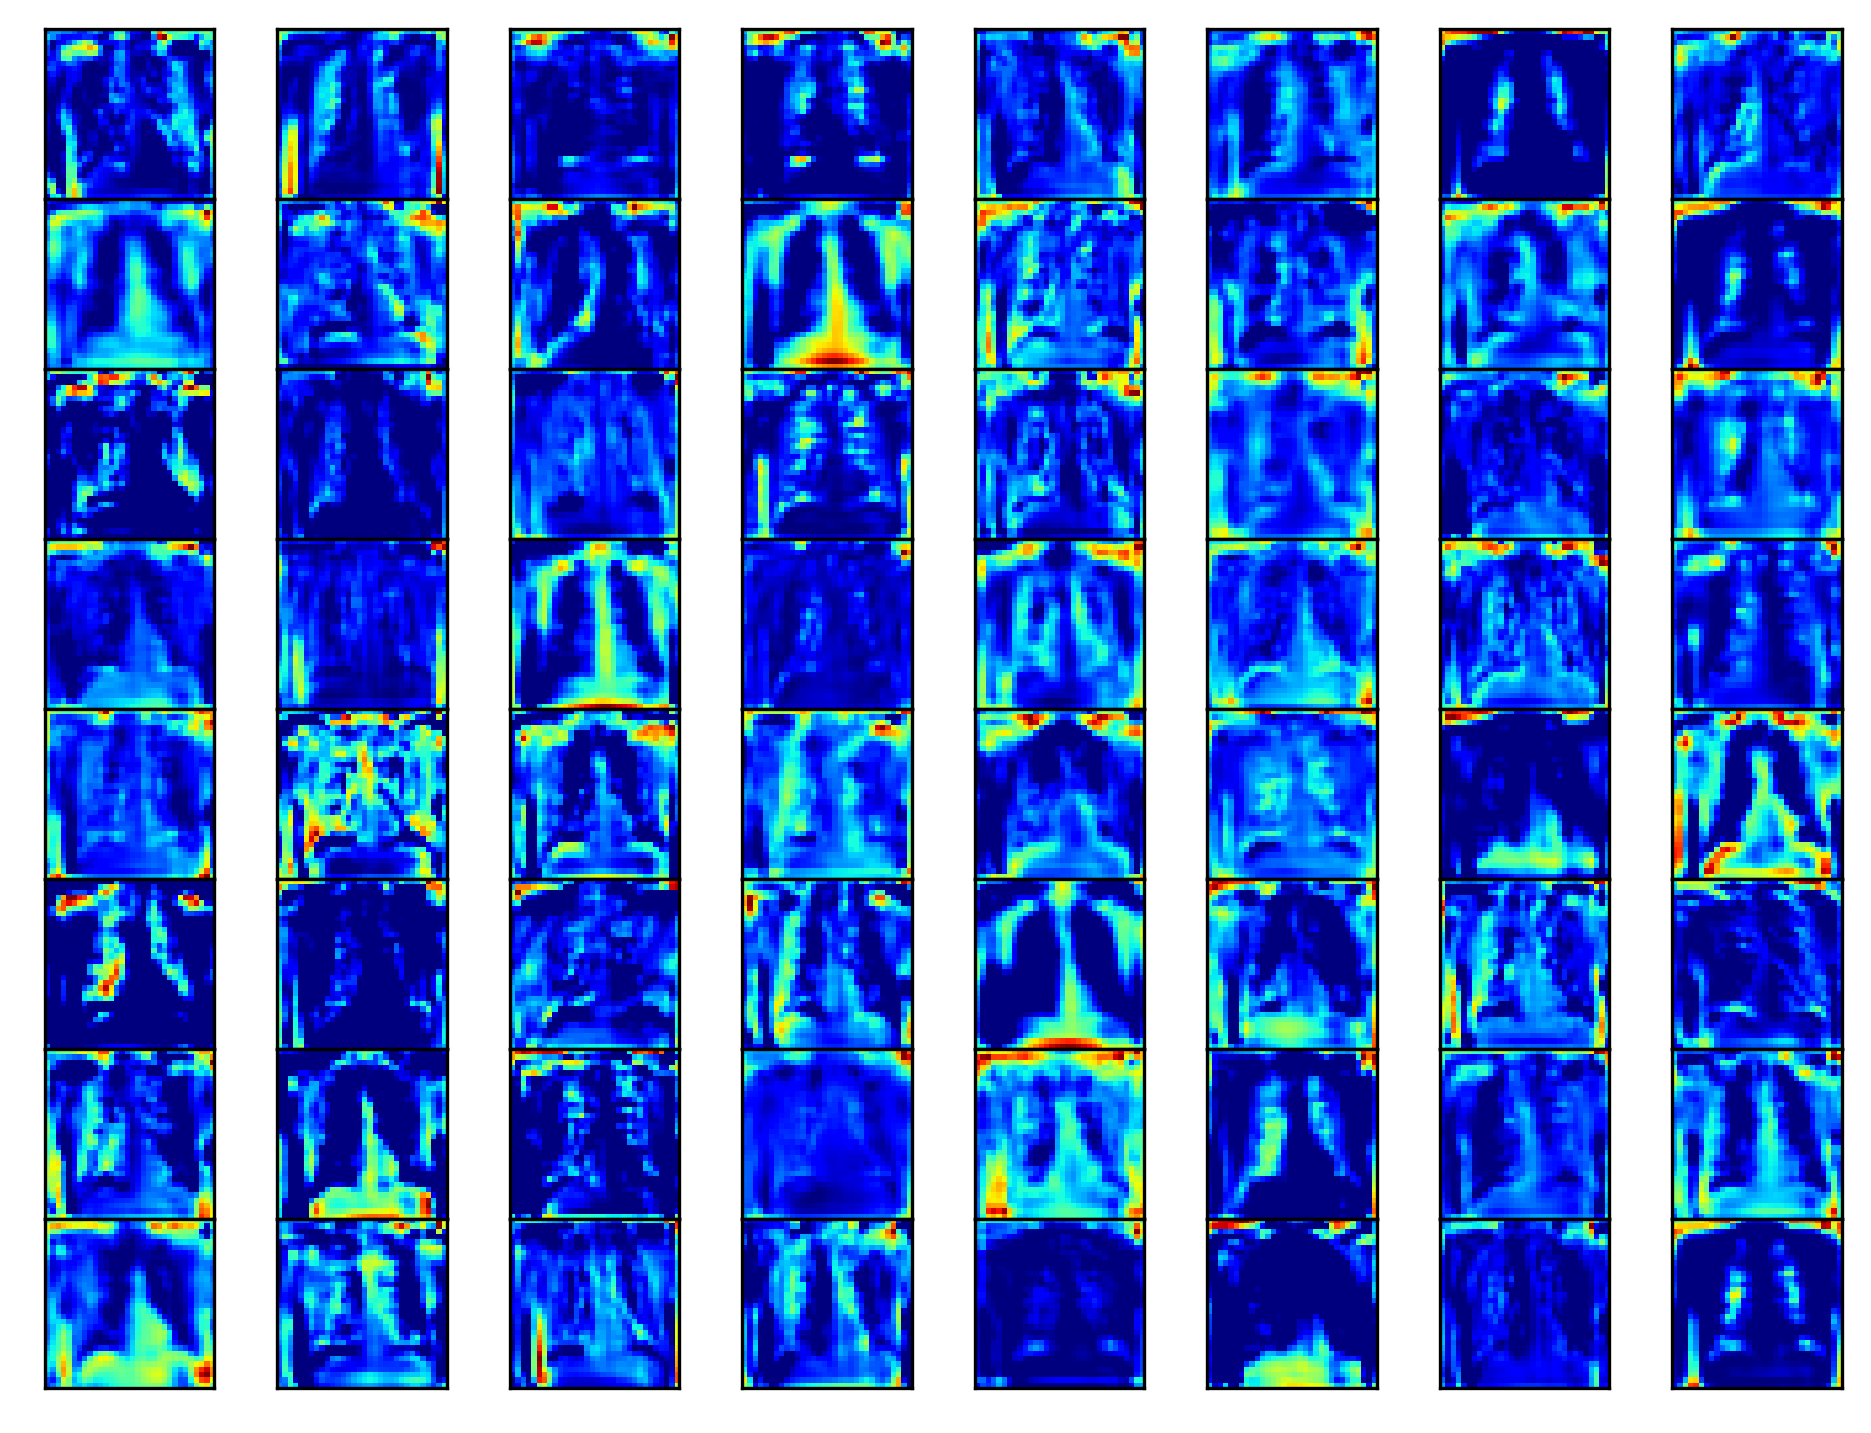

In [132]:
feature_maps = predict(model,df,(128,128))
visualize(feature_maps,square=8)

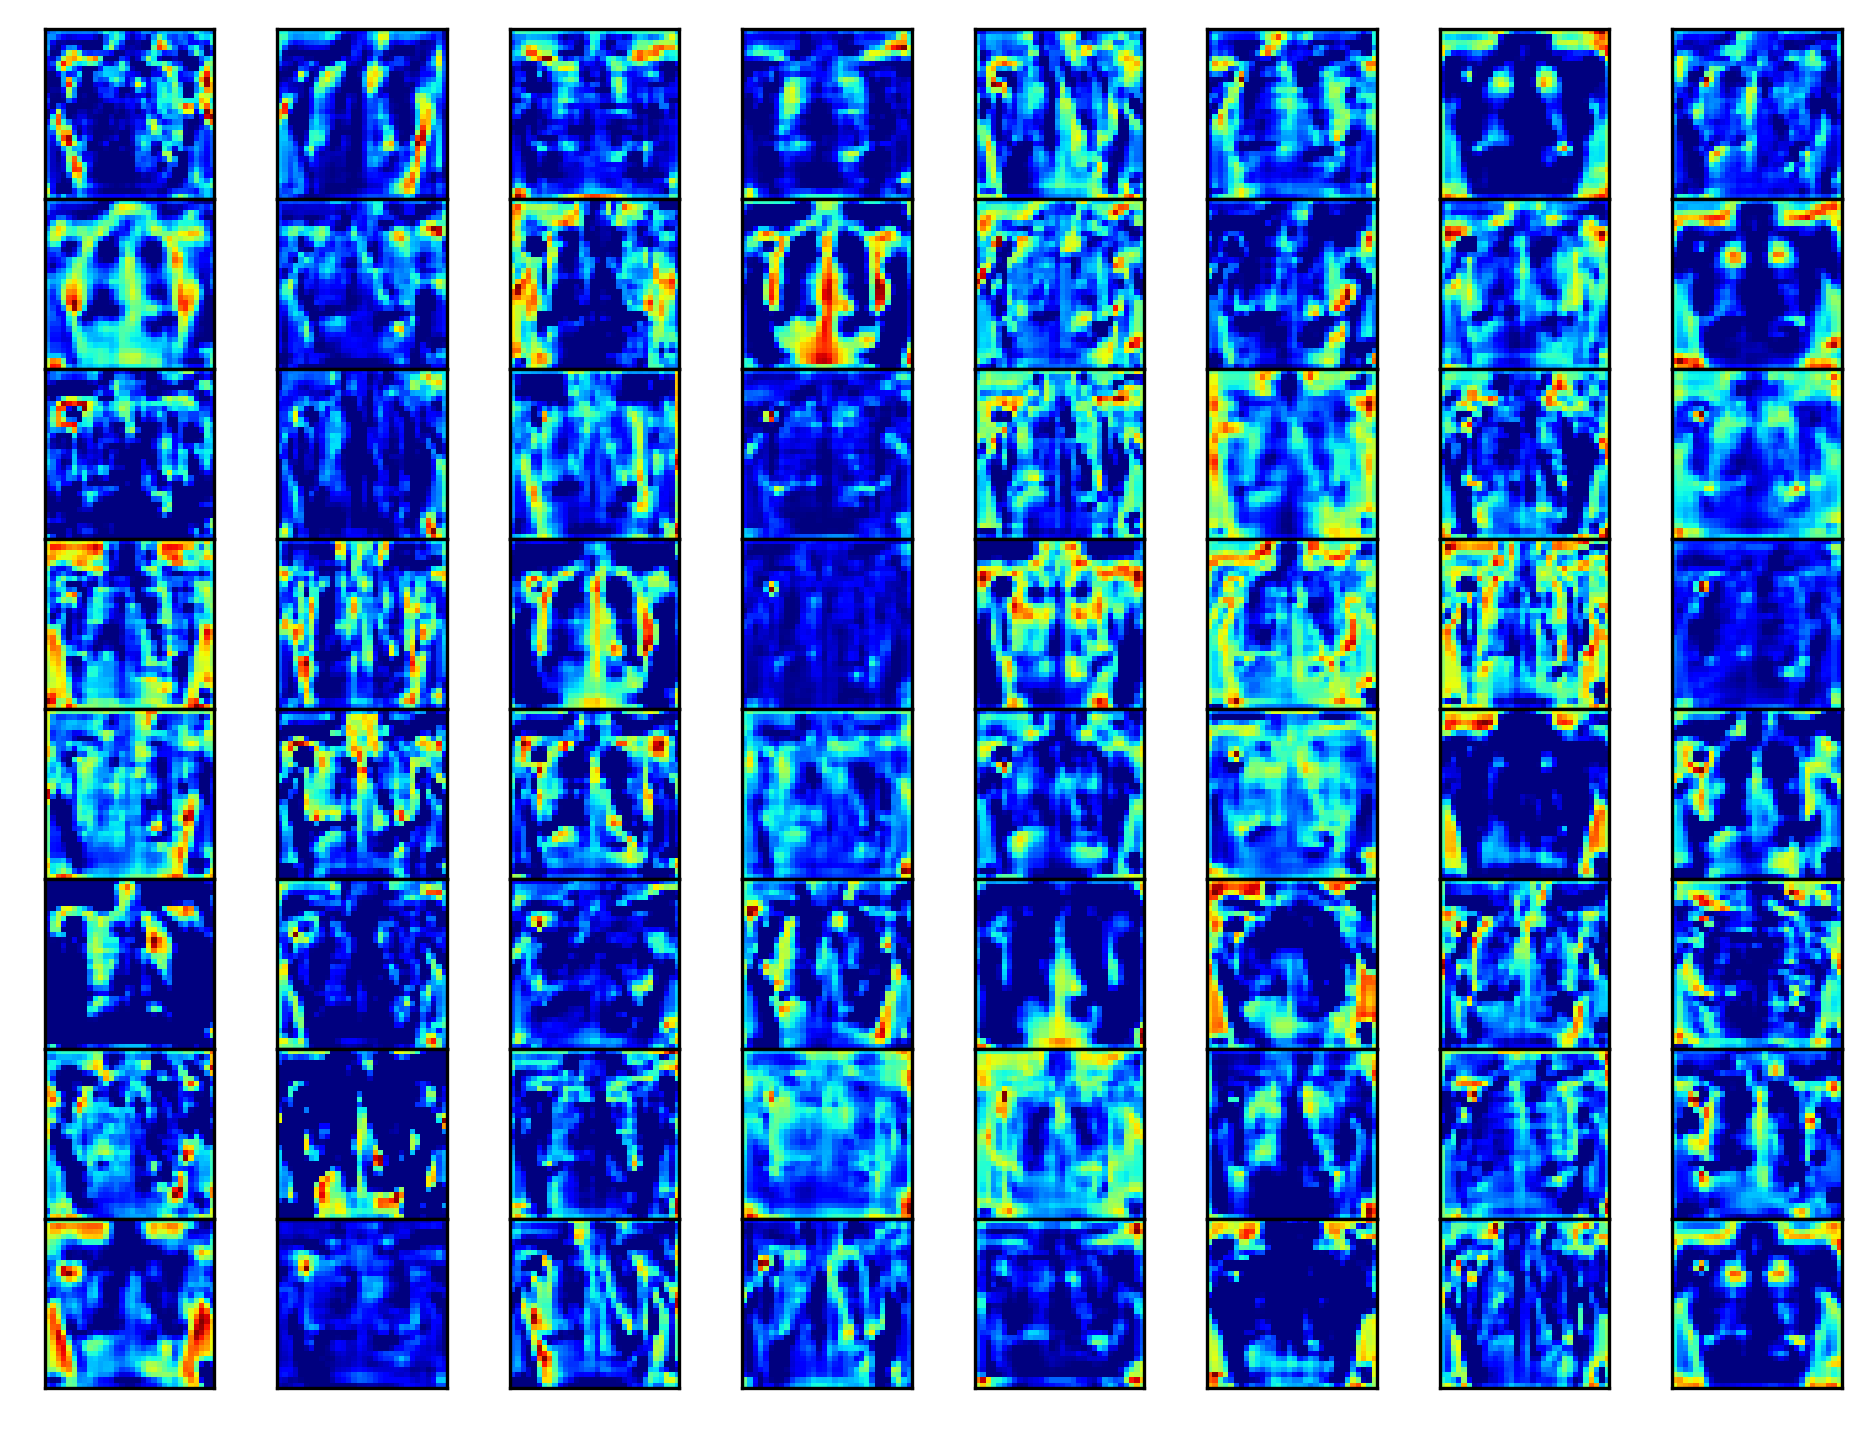

In [49]:
square = 8
ix = 1
plt.figure(figsize=(8,6),dpi=300)
for _ in range(square):
    for _ in range(square):
        ax  =  plt.subplot(square,square,ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,ix-1],cmap=plt.cm.jet) #,cmap=plt.cm.rainbow
        ix += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'{figure}/vgg19_after_retrain_.pdf',bbox_inches='tight', dpi=300)
plt.show()

# ResNet-50

In [50]:

model =  ResNet50(weights='imagenet',include_top=False)
model =  Model(inputs=model.input, outputs=model.layers[48].output)
img =  image.load_img(img_path,target_size=(224,224))
x =  image.img_to_array(img)
x  =  np.expand_dims(x,axis=0)
x =  preprocess_input(x)
feature_maps =  model.predict(x)

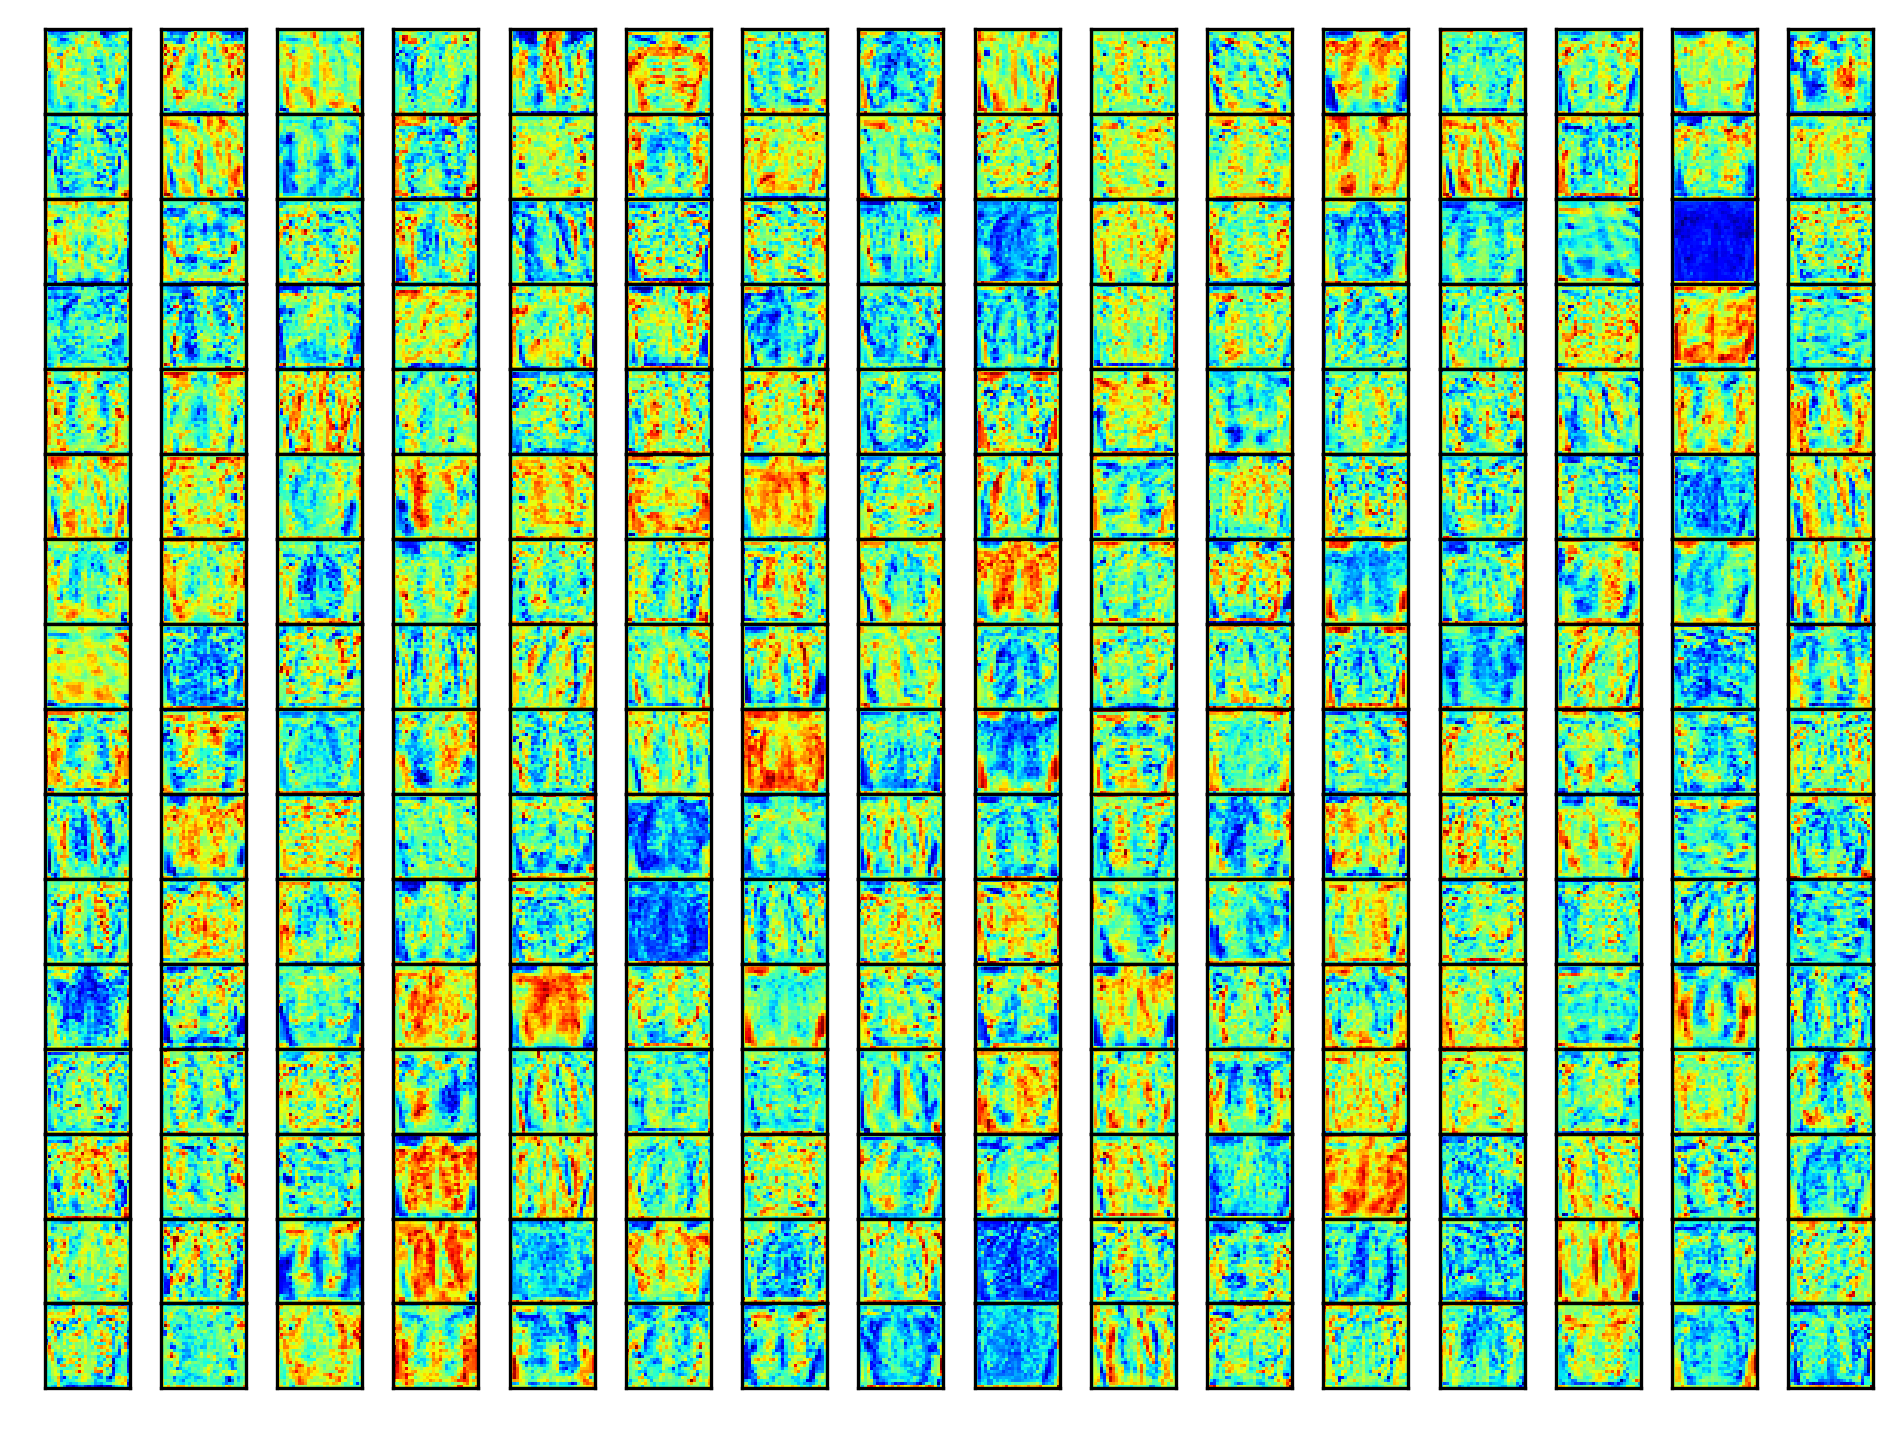

In [51]:
square = 16
ix = 1
plt.figure(figsize=(8,6),dpi=300)
for _ in range(square):
    for _ in range(square):
        ax  =  plt.subplot(square,square,ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,ix-1],cmap=plt.cm.jet) #,cmap=plt.cm.rainbow
        ix += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'{figure}/resnet50_before_retrain_.pdf',bbox_inches='tight', dpi=300)
plt.show()


# We are visualizing the first convolution block in the trained ResNet-50 model

In [52]:
mpath =  '/Users/yusuf/Downloads/models/ResNet50.model.h5'
tmodel =  load_model(mpath)
model =  Model(inputs=tmodel.input, outputs=tmodel.layers[48].output)
img =  image.load_img(img_path,target_size=(128,128))
x =  image.img_to_array(img)
x  =  np.expand_dims(x,axis=0)
x =  preprocess_input(x)
feature_maps =  model.predict(x)


In [29]:
# for i in range(len(tmodel.layers)):
#     layer =  tmodel.layers[i]
#     if 'conv' not in layer.name:
#         continue
    
#     print(i,layer.name,layer.output.shape)

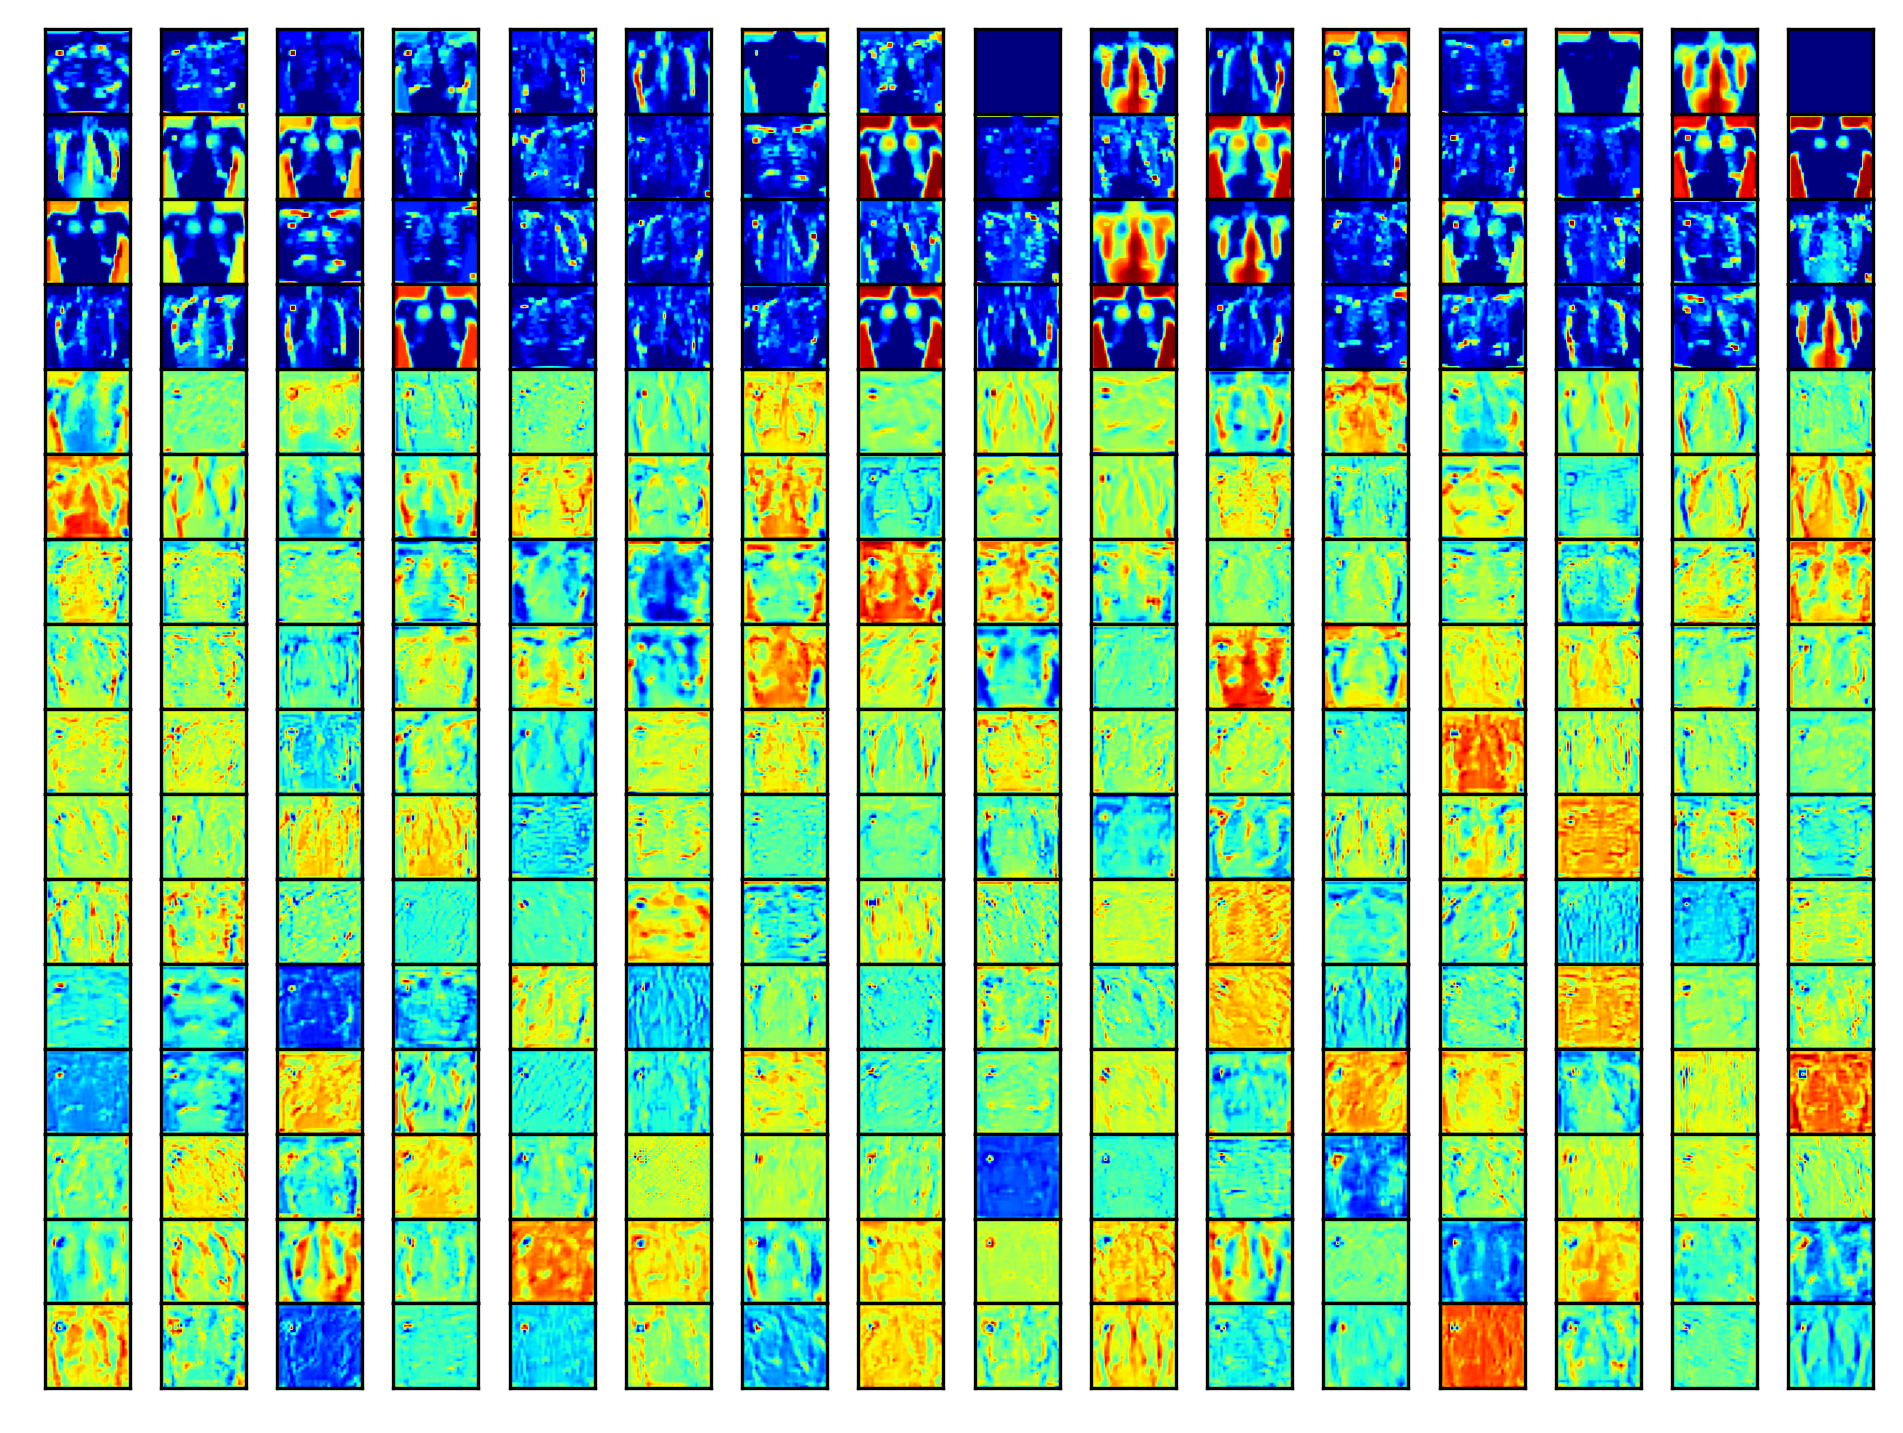

In [53]:
square = 16
ix = 1
plt.figure(figsize=(8,6),dpi=300)
for _ in range(square):
    for _ in range(square):
        ax  =  plt.subplot(square,square,ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,ix-1],cmap=plt.cm.jet) #,cmap=plt.cm.rainbow
        ix += 1
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'{figure}/resnet50_after_retrain_.pdf',bbox_inches='tight', dpi=300)
plt.show()

In [258]:
mpath =  '/Users/yusuf/Downloads/models/ResNet50.model.h5'
tmodel =  load_model(mpath)
model =  Model(inputs=tmodel.input, outputs=tmodel.layers[8].output)
img =  image.load_img(img_path,target_size=(128,128))
x =  image.img_to_array(img)
x  =  np.expand_dims(x,axis=0)
x =  preprocess_input(x)
feature_maps =  model.predict(x)

In [193]:
feature_maps.shape

(1, 32, 32, 64)

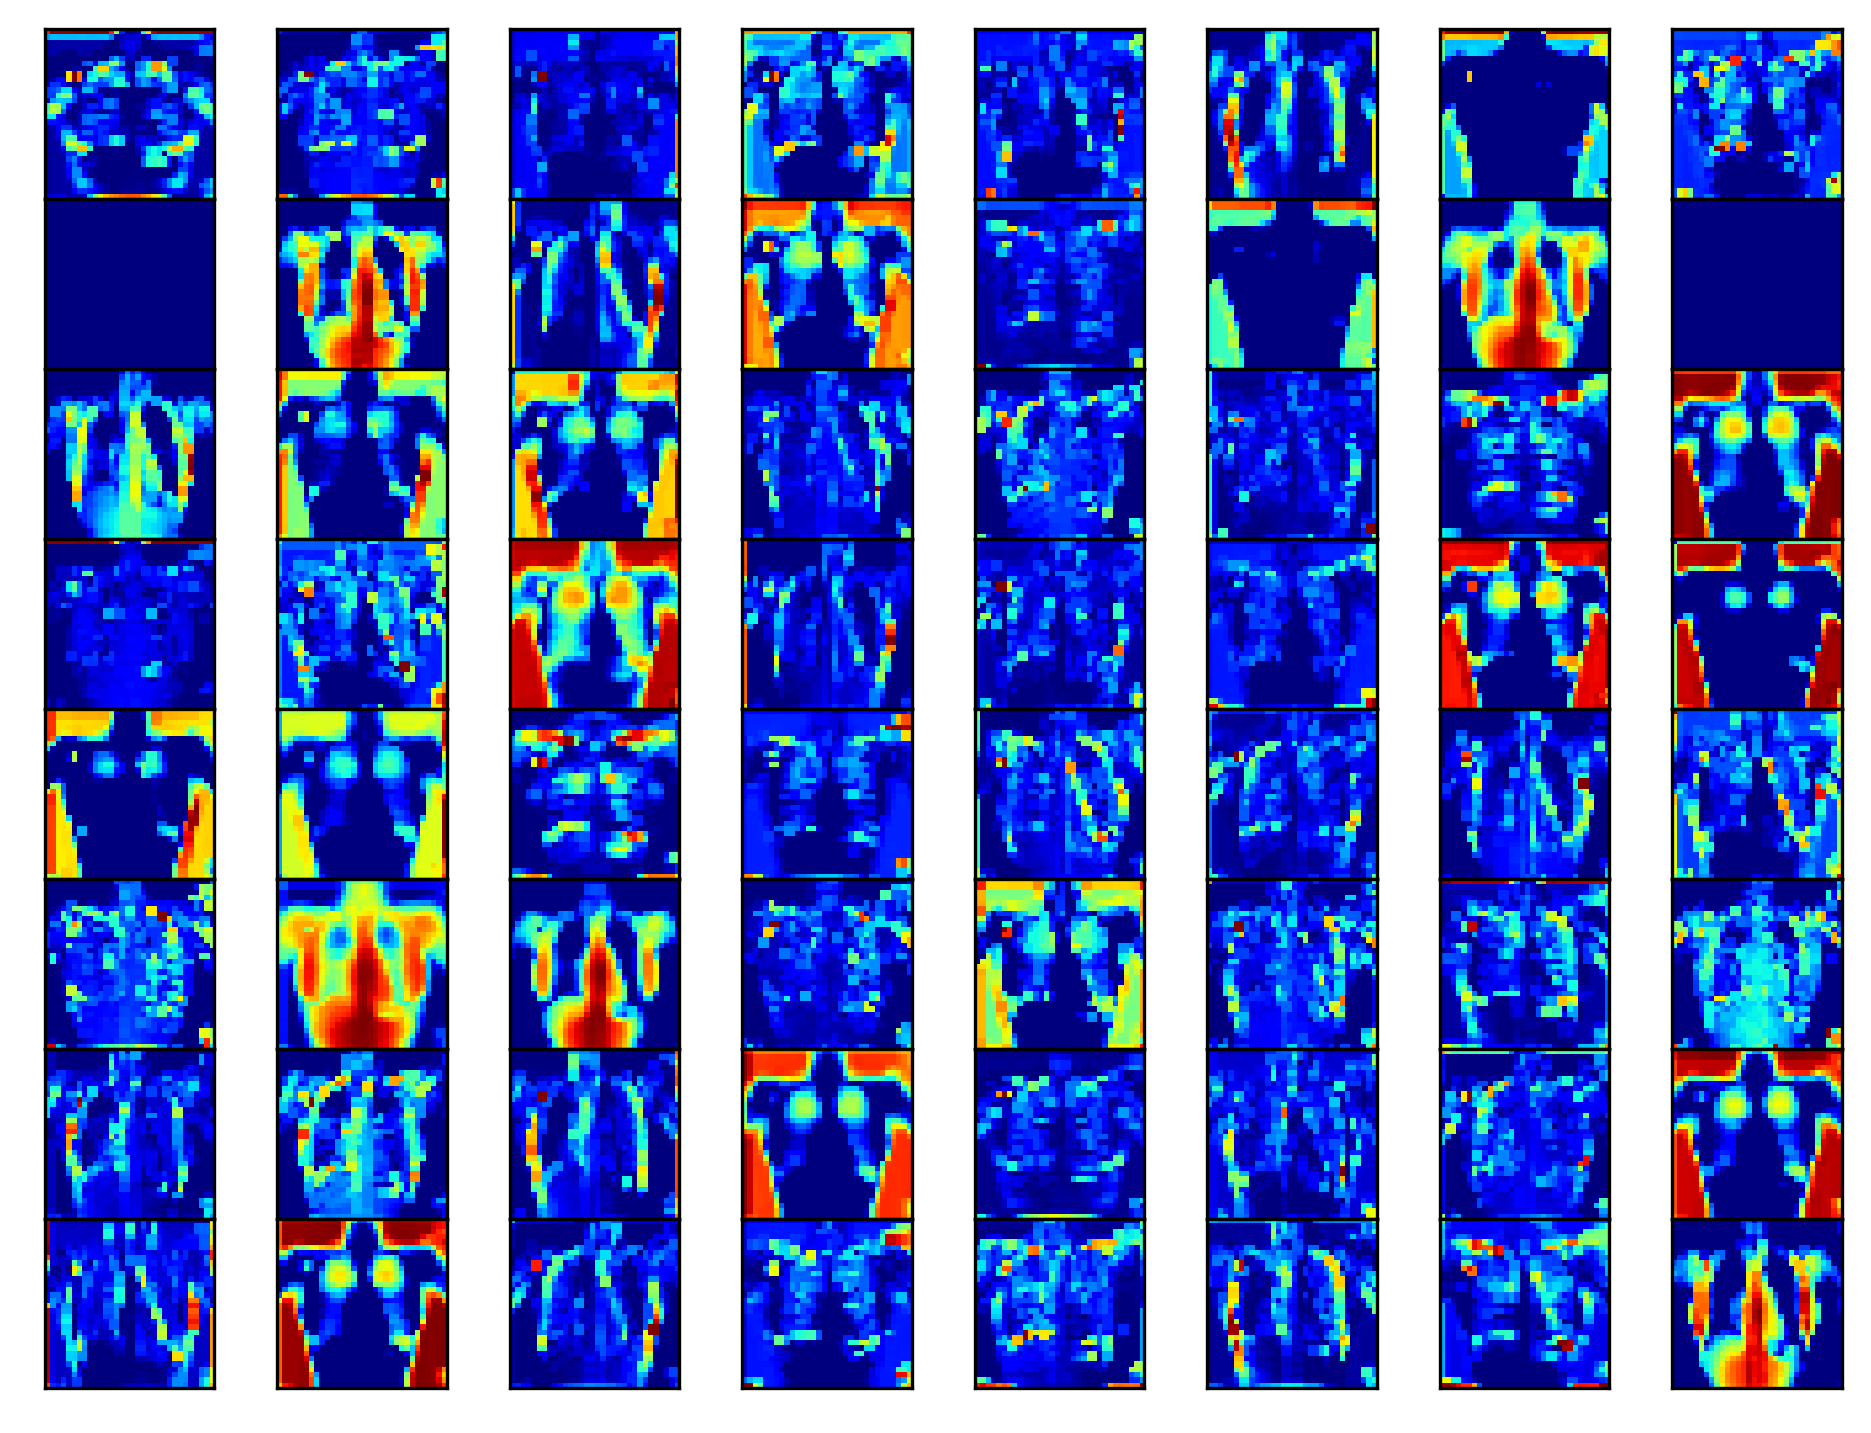

In [259]:
square = 8
ix = 1
plt.figure(figsize=(8,6),dpi=300)
for _ in range(square):
    for _ in range(square):
        ax  =  pyplot.subplot(square,square,ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(feature_maps[0,:,:,ix-1],cmap=plt.cm.jet,interpolation='nearest') #,cmap=plt.cm.rainbow
        ix += 1
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'{figure}/resnet50_after_retrain_.pdf',bbox_inches='tight', dpi=300)
plt.show()